<a href="https://colab.research.google.com/github/OlgaZy/Python_for_DA/blob/main/HW_10_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [43]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [44]:
print("matplotlib version:", matplotlib.__version__)

matplotlib version: 3.10.0


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/DA_in_IT/Data/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [47]:
# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [48]:
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [49]:
grouped_by_month_df = df['count'].resample('ME').agg(['mean'])
grouped_by_month_df

,mean
datetime,
2011-01-31,54.645012
2011-02-28,73.641256
2011-03-31,86.849776
2011-04-30,111.026374
2011-05-31,174.809211
2011-06-30,196.877193
2011-07-31,203.614035
2011-08-31,182.666667
2011-09-30,174.622517


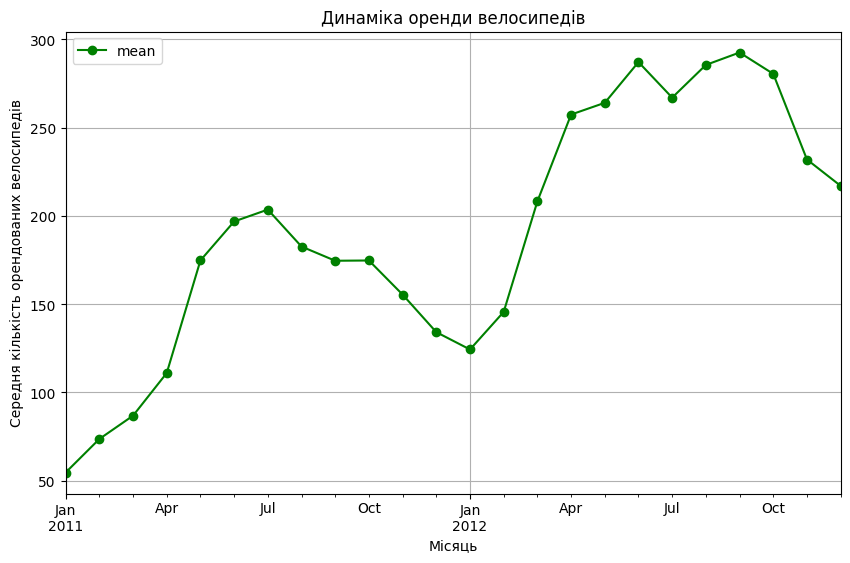

In [50]:
grouped_by_month_df.plot(
    kind = 'line',
    marker = 'o',
    figsize = (10, 6),
    title = 'Динаміка оренди велосипедів',
    xlabel = 'Місяць',
    ylabel = 'Середня кількість орендованих велосипедів',
    grid = True,
    color='green'
);

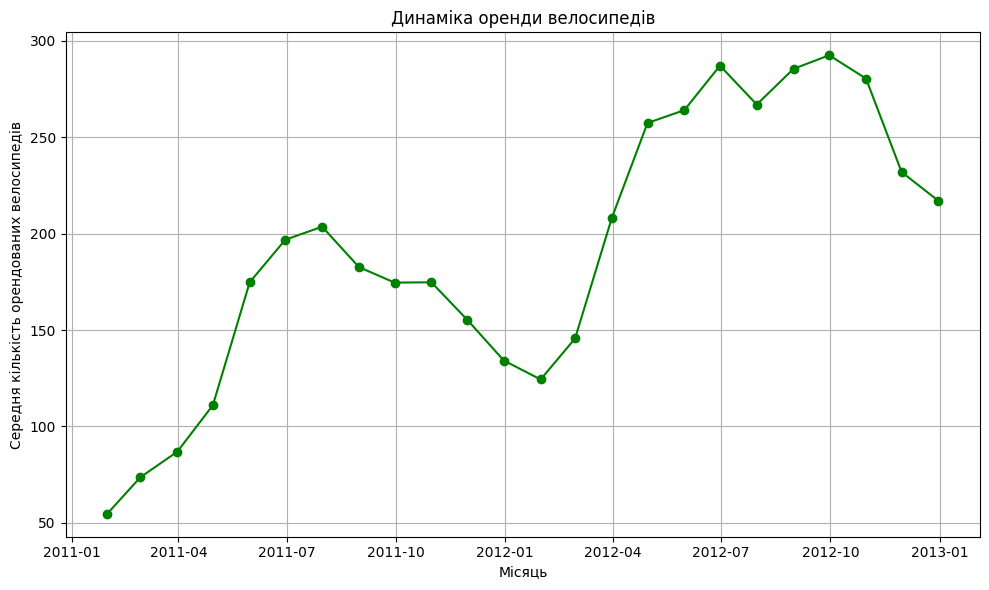

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_month_df, 'o-', color='green')
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість орендованих велосипедів')
plt.grid(True)
plt.tight_layout()
plt.show();

### Опишіть свої спостереження: чим відрізняються 2 побудованих графіки? Який вам більше подобається?

Мені в цьому конкретному випадку сподобався більше 1 графік, бо я швидко отримала те, що мені потрібно: лінійний графік, поділки для осі х на місяці.
В другому графіку ми теж отрамали такий результат, але потрібно більше налаштувань, що забирає час, наприклад щоб зробити тіж помісячні поділки для осі х.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [52]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

In [53]:
data = {
    'Day' : days,
    'Sales_week1' : sales_week1,
    'Sales_week2' : sales_week2
}
list_df = pd.DataFrame(data)
list_df

,Day,Sales_week1,Sales_week2
0,1,1349,1321
1,2,1562,1263
2,3,1600,1162
3,4,1606,1406
4,5,1510,1421
5,6,959,1248
6,7,822,1204


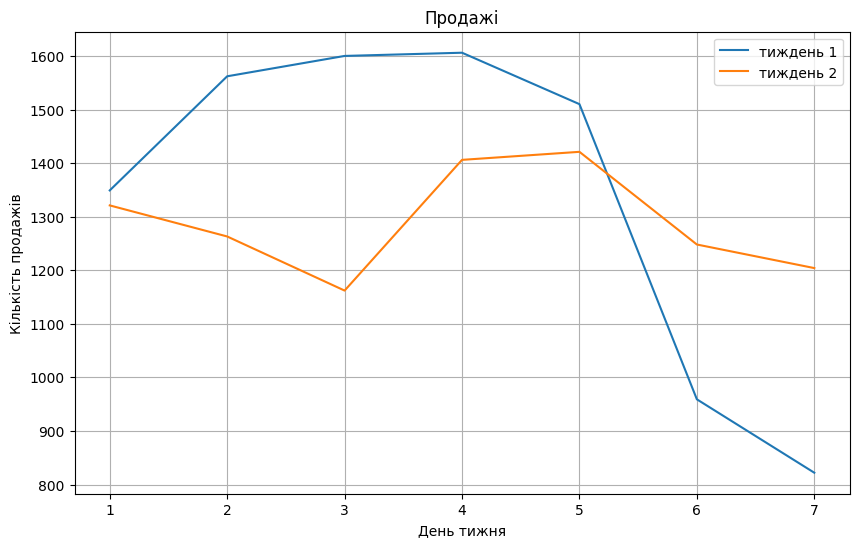

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(list_df['Day'], list_df['Sales_week1'], label='тиждень 1')
plt.plot(list_df['Day'], list_df['Sales_week2'], label='тиждень 2')
plt.title('Продажі')
plt.ylabel('Кількість продажів')
plt.xlabel('День тижня')
plt.grid(True)
plt.legend()
plt.show()

### Дайте відповіді на питання

- Судячи з графіку, в який тиждень проодажі були стабільніше?
  - За графіком вижно, що продажі були стабільніше у 2 тиждень, бо коливалися були приблизно в діапазоні 1200-1400, а в 1 тиждень кількість продажів різко зросла, а потім різко упала

- Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.
 - Можна обчислити дисперсію, вона покаже на скільки значення даних відхиляються від свого середнього значення, тобто отримаємо розкид даних. Чим менше дисперсія, тим менше розкид даних. Значить тиждень у якому більш стабільні продажі буде мати меншу дисперсію. Розрахуємо нижче.


In [55]:
var_week1 = list_df['Sales_week1'].var()
var_week2 = list_df['Sales_week2'].var()
var_week1, var_week2

(104999.0, 9641.238095238097)

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [56]:
# 1. Cередня температури помісячно
monthly_temp = df.groupby('month')['temp'].mean()
monthly_temp

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


In [57]:
# 2. Середня кількості оренд за сезонами.
def add_season(month):
    if month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Літо'
    elif month in [9, 10, 11]:
        return 'Осінь'
    else:
        return 'Зима'

df['season_name'] = df['month'].apply(add_season)
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day,season_name
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1,Зима
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1,Зима


In [58]:
# Встановлюємо потрібний порядок
grouped_by_season = df.groupby('season_name')['count'].mean().round().reset_index()
ordered_seasons = ['Весна', 'Літо', 'Осінь', 'Зима']
grouped_by_season['season_name'] = pd.Categorical(grouped_by_season['season_name'],
                                                  categories=ordered_seasons,
                                                  ordered=True)

grouped_by_season = grouped_by_season.sort_values('season_name')
grouped_by_season

,season_name,count
0,Весна,184.0
2,Літо,237.0
3,Осінь,218.0
1,Зима,126.0


In [59]:
# 3. Гістограма вологості
humidity_df = df['humidity']

# 4. Scatter plot температури vs кількості оренд
temp_data = df['temp']
count_data = df['count']

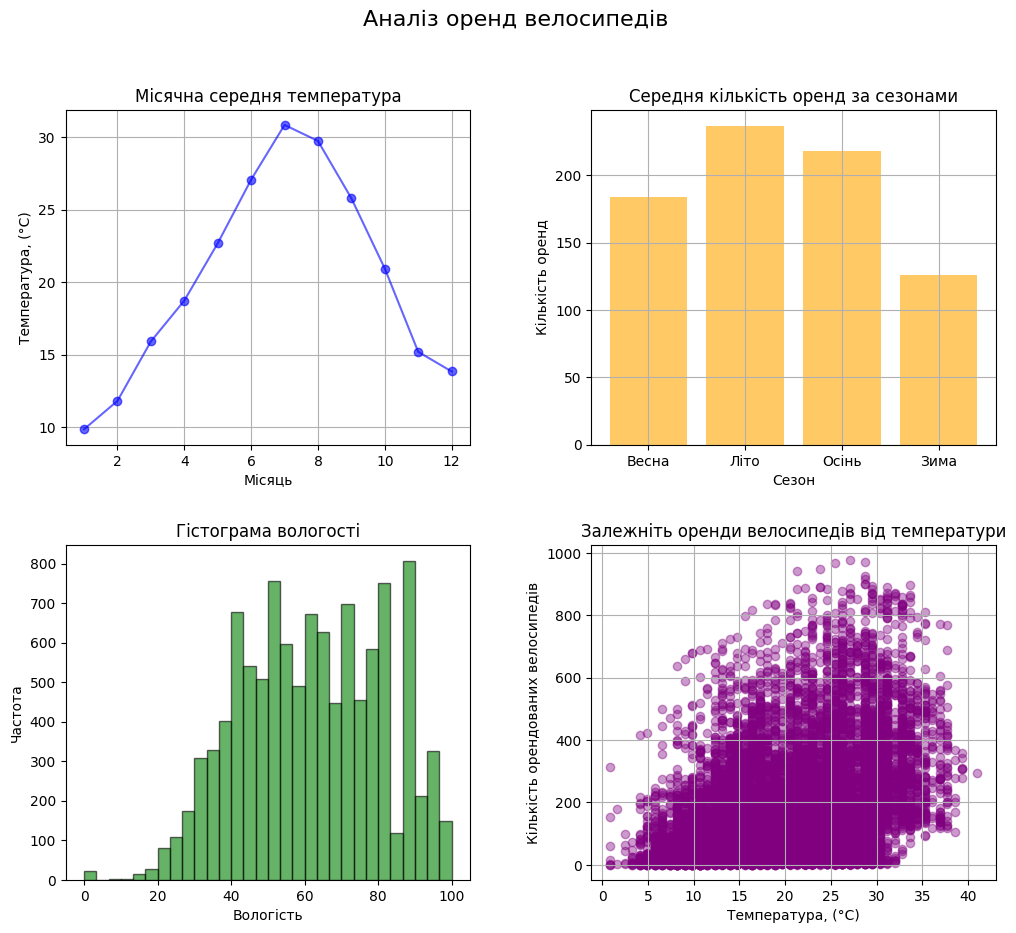

In [60]:
# --- Створення дашборду ---
plt.figure(figsize=(12, 10))
plt.suptitle("Аналіз оренд велосипедів", fontsize=16)

# Лінійний графік
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', alpha=0.6, color='blue')
plt.title("Місячна середня температура")
plt.xlabel("Місяць")
plt.ylabel("Температура, (°C)")
plt.grid(True)

# Стовпчикова діаграма
plt.subplot(2, 2, 2)
plt.bar(grouped_by_season['season_name'], grouped_by_season['count'], alpha=0.6, color='orange')
plt.title("Середня кількість оренд за сезонами")
plt.xlabel("Сезон")
plt.ylabel("Кількість оренд")
plt.grid(True)

# Гістограма
plt.subplot(2, 2, 3)
plt.hist(humidity_df, bins=30, alpha=0.6, color='green', edgecolor='black')
plt.title("Гістограма вологості")
plt.xlabel("Вологість")
plt.ylabel("Частота")

# Scatter plot
plt.subplot(2, 2, 4)
plt.scatter(temp_data, count_data, alpha=0.4, color='purple')
plt.title("Залежніть оренди велосипедів від температури")
plt.xlabel("Температура, (°C)")
plt.ylabel("Кількість орендованих велосипедів")

plt.grid(True)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

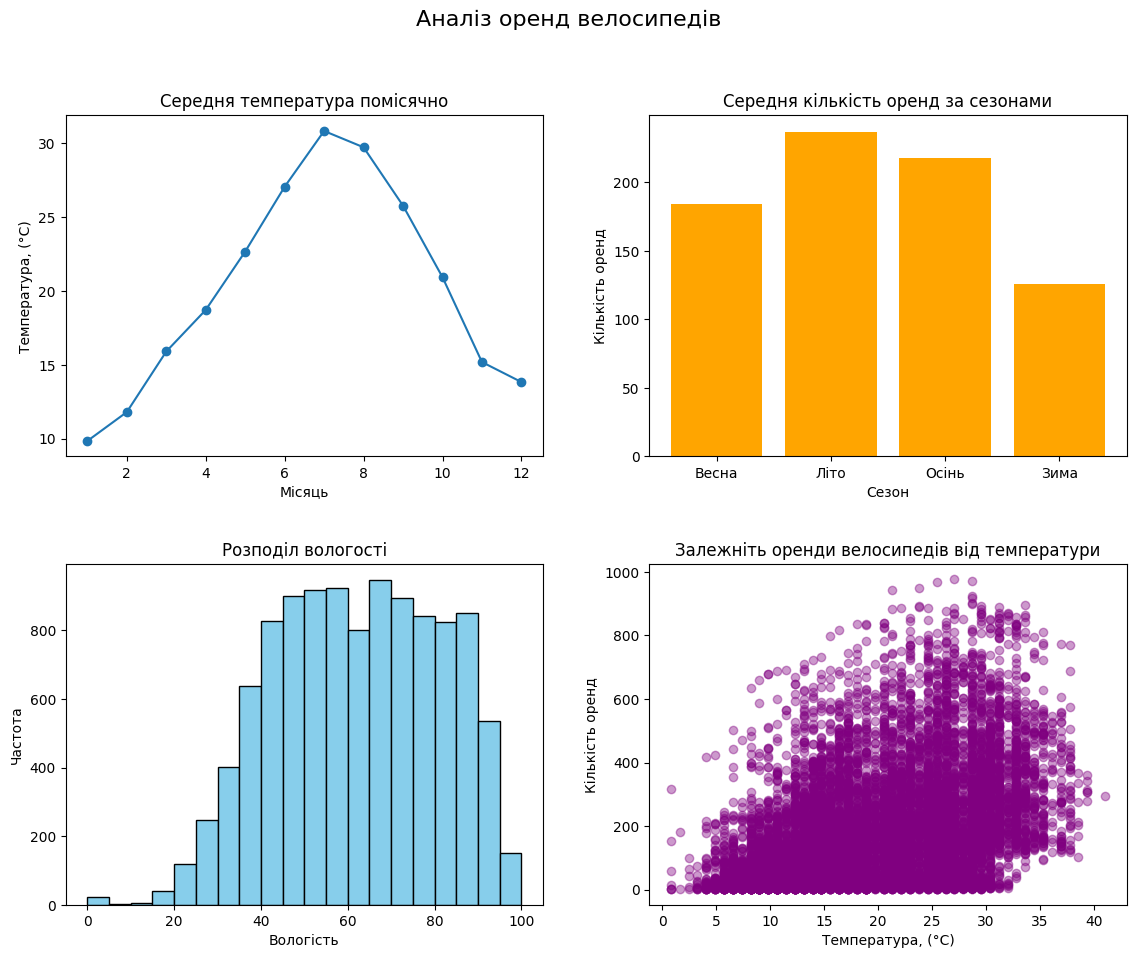

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Лінійний графік температури
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура, (°C)')

# Стовпчикова діаграма
ax[0, 1].bar(grouped_by_season['season_name'], grouped_by_season['count'], color='orange')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')

# Гістограма вологості
ax[1, 0].hist(humidity_df, bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')

# Scatter plot
ax[1, 1].scatter(temp_data, count_data, alpha=0.4, color='purple')
ax[1, 1].set_title('Залежніть оренди велосипедів від температури')
ax[1, 1].set_xlabel('Температура, (°C)')
ax[1, 1].set_ylabel('Кількість оренд')

fig.suptitle('Аналіз оренд велосипедів', fontsize=16)

fig.tight_layout(pad=3.0)
plt.show()

### Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?
- plt.subplot більш сучасний метод побудови дашборду, має ооп підхід, при великій кількості графіків є можливість звертатися до кожного в циклі

In [62]:
import matplotlib.dates as mdates
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day,season_name
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1,Зима
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1,Зима


In [89]:
df['year_month'] = df.index.to_period('M')
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day,season_name,year_month
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1,Зима,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1,Зима,2011-01


In [72]:
group_by_monthes = df.groupby('year_month').agg( Mean = ('count','mean'), Minimum = ('count','min'), Maximum = ('count','max') )
group_by_monthes

,Mean,Minimum,Maximum
year_month,,,
2011-01,54.645012,1,219
2011-02,73.641256,1,327
2011-03,86.849776,1,332
2011-04,111.026374,1,452
2011-05,174.809211,1,611
2011-06,196.877193,1,638
2011-07,203.614035,1,596
2011-08,182.666667,1,600
2011-09,174.622517,1,628


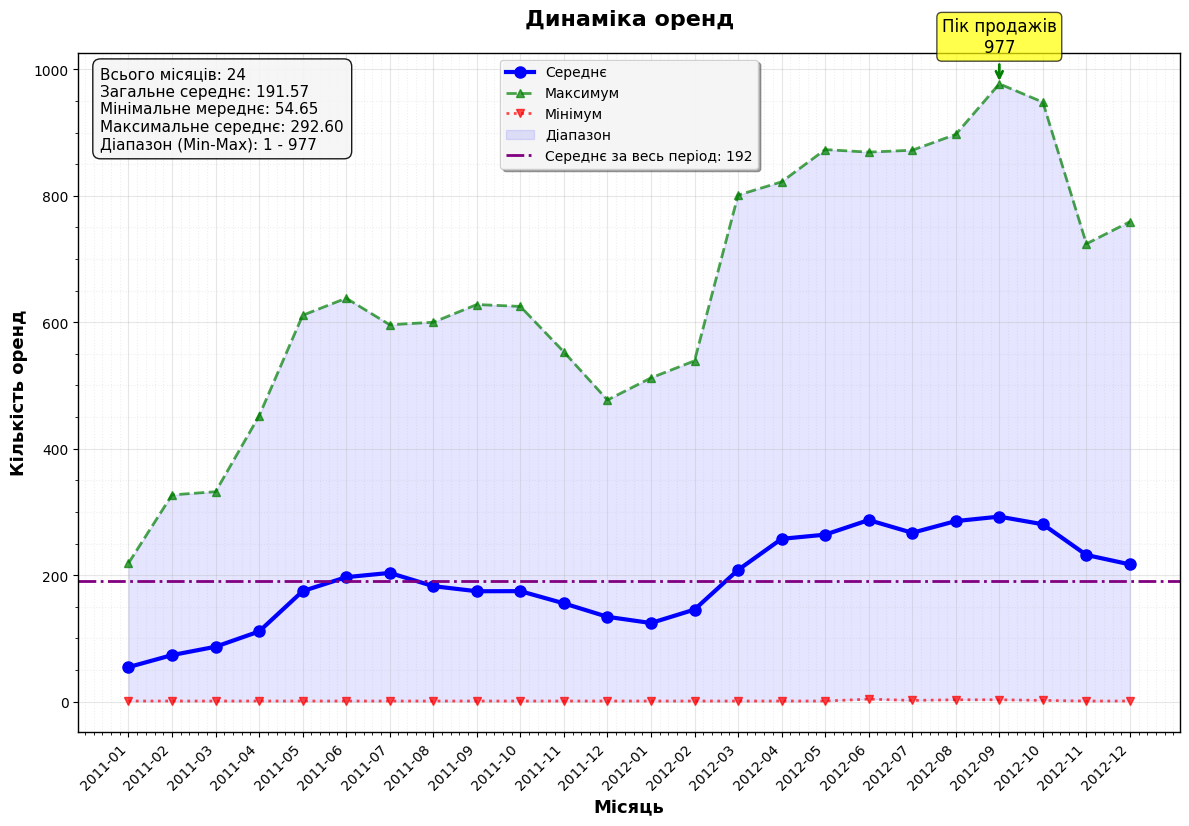

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))

# Малюємо лінії з різними стилями
ax.plot(group_by_monthes.index.astype(str), group_by_monthes['Mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(group_by_monthes.index.astype(str), group_by_monthes['Maximum'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(group_by_monthes.index.astype(str), group_by_monthes['Minimum'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(group_by_monthes.index.astype(str), group_by_monthes['Minimum'], group_by_monthes['Maximum'],
                alpha=0.1, color='blue', label='Діапазон')

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за весь період: {overall_mean:.0f}')

# Текстовий блок зі статистикою в кутку графіка
textstr = '\n'.join((
    f'Всього місяців: {len(group_by_monthes.index)}',
    f'Загальне середнє: {overall_mean:.2f}',
    f'Мінімальне мереднє: {min(group_by_monthes["Mean"]):.2f}',
    f'Максимальне середнє: {max(group_by_monthes["Mean"]):.2f}',
    f'Діапазон (Min-Max): {min(group_by_monthes["Minimum"])} - {max(group_by_monthes["Maximum"])}'
))
props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=0.9)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Додаємо анотації для екстремальних значень
max_idx = str(group_by_monthes['Maximum'].idxmax())
max_val = group_by_monthes['Maximum'].max()
ax.annotate(f'Пік продажів\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=13, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=13, fontweight='bold')
ax.set_title('Динаміка оренд',
             fontsize=16, fontweight='bold', pad=20)

# Покращуємо легенду
ax.legend(loc='upper center', fontsize=10, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)


# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.0)

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

fig.tight_layout()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

### Яка перевага додавання анотацій на графік?
- Швидке виділення важливого
- Пояснення контексту
- Професійний вигляд

### Для чого використовується fill_between()?
- заповнює кольором область між двома лініями по осі Y


### Як текстовий блок допомагає в інтерпретації даних?
- Швидкий доступ до зведених метрик — загальне середнє, максимум, мінімум,кількість точок можна побачити без окремого аналізу в коді.